In [1]:
# Libraries
import sys, os
import mne # Python package for processing and analyzing electrophysiological data
import pickle
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### single condition-wise

In [ ]:
# load data
# ~~~~~~~~~~~~~~ Parameters
group = 'adult' # 'adult' or 'baby'
modality = 'visual' # 'visual' or 'audio'

subject_lists = ['sub-03', 'sub-04', 'sub-05', 'sub-06', 'sub-07', 'sub-08']
target_lists = ['singledot', 'totaldot', 'circum']

for subject in subject_lists:


    for target_cond in target_lists: # 'all', 'singledot', 'totaldot', 'circum'

        # Print out each parameter
        print(f"{group} subject {subject}: {modality} data will be visualized")
        print(f"Target: {target_cond}")
        # ~~~~~~~~~~~~~~ Parameters ~~~~~~~~~~~~~~


        # ~~~~~~~~~~~~~~ Set the working directory
        path = f"/ptmp/kazma/DATA-MINT/data/{group}/processed/{modality}"
        sub_folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
        sub_folders_sorted = sorted(sub_folders, key=lambda x: int(re.search(r'\d+', x).group())) # Sort the folders based on the numeric part after "sub-"
        # ~~~~~~~~~~~~~~ Set the working directory ~~~~~~~~~~~~~~



        ### SUB_LOOP


        filename_acc = f"EEGNet_accuracy_{target_cond}.pkl"

        sub_filename_accuracy = os.path.join(path, subject, filename_acc)

        # Open the file and load data
        with open(sub_filename_accuracy, 'rb') as file:
            data = pickle.load(file)
        data_acc = pd.DataFrame([data])

        # each subject's file name
        filename_std = f"EEGNet_std_{target_cond}.pkl"

        sub_filename_std = os.path.join(path, subject, filename_std)

        # Open the file and load data
        with open(sub_filename_std, 'rb') as file:
            data = pickle.load(file)
        data_std = pd.DataFrame([data])

        # Define column names as shown in the image
        column_names = [
            "1 vs. 2",
            "1 vs. 3",
            "1 vs. 4",
            "1 vs. 5",
            "1 vs. 6",
            "2 vs. 3",
            "2 vs. 4",
            "2 vs. 5",
            "2 vs. 6",
            "3 vs. 4",
            "3 vs. 5",
            "3 vs. 6",
            "4 vs. 5",
            "4 vs. 6",
            "5 vs. 6"
        ]

        # Convert column name
        data_acc.columns=column_names
        data_std.columns=column_names
        std_values = data_std.iloc[0]

        data_acc.iloc[0].plot(kind='bar', 
                        figsize=(10, 6), 
                        color='skyblue', 
                        alpha=0.6,
                        edgecolor='black',
                        linewidth=1,
                        yerr = std_values,
                        capsize=2)
        plt.xlabel("Conditions")
        plt.ylabel("Accuracy")
        plt.ylim(0.4,0.8)
        plt.xticks(fontsize=12, rotation=45)
        plt.yticks(np.arange(0.4, 0.81, 0.05), labels=[f'{y:.2f}' for y in np.arange(0.4, 0.81, 0.05)], fontsize=12)
        plt.axhline(y=0.5, color='black', linestyle='--', linewidth=1)

        # save the image
        figname = f"EEGNet_decoding_{target_cond}.png"

        #
        plt.savefig(f"{path}/{subject}/{figname}", dpi=300, bbox_inches='tight')

        plt.show()

### All three conditions

adult subject sub-03: visual data will be visualized


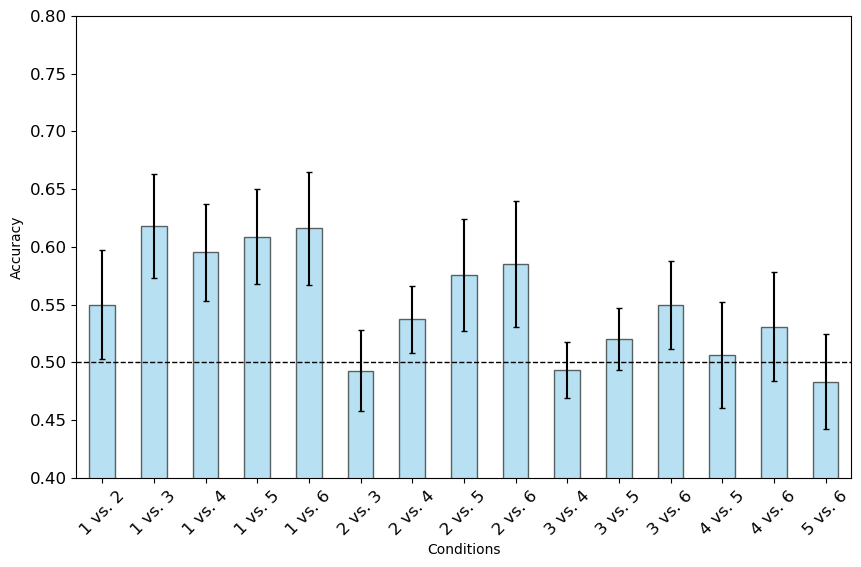

adult subject sub-04: visual data will be visualized


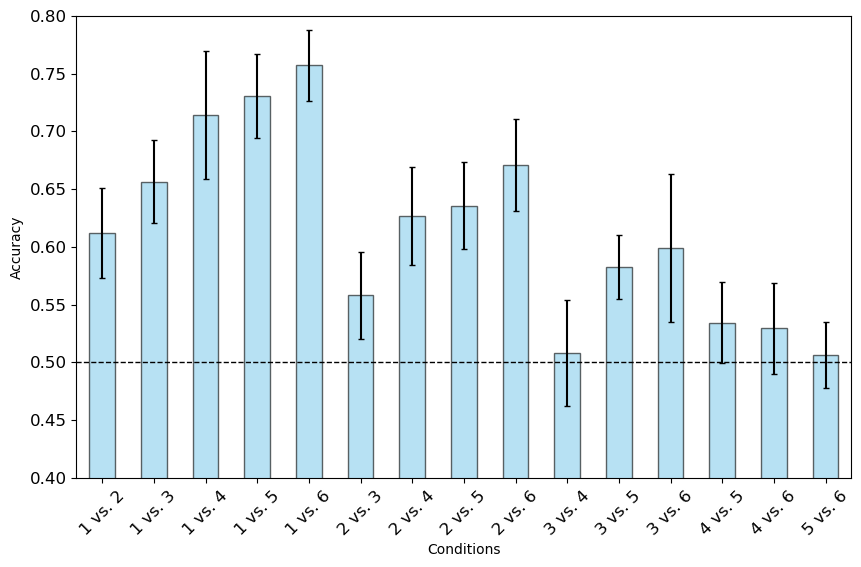

adult subject sub-05: visual data will be visualized


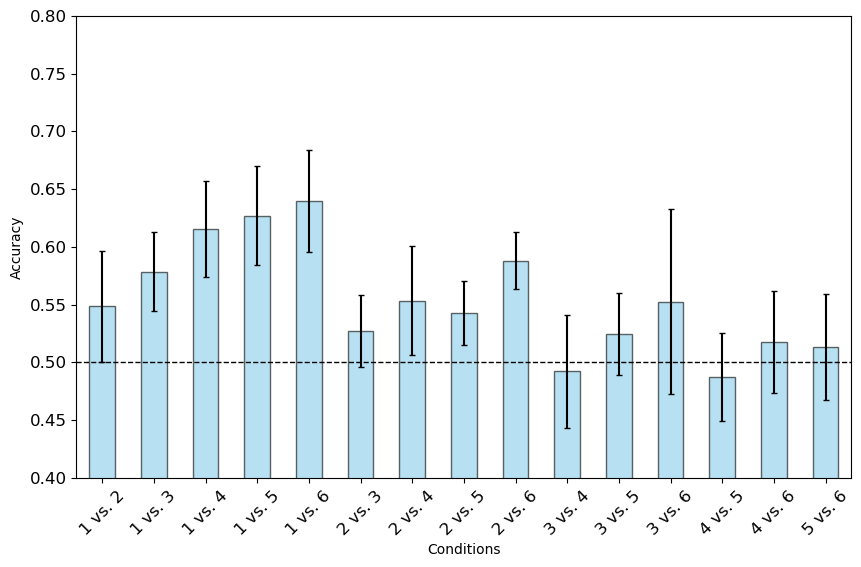

adult subject sub-06: visual data will be visualized


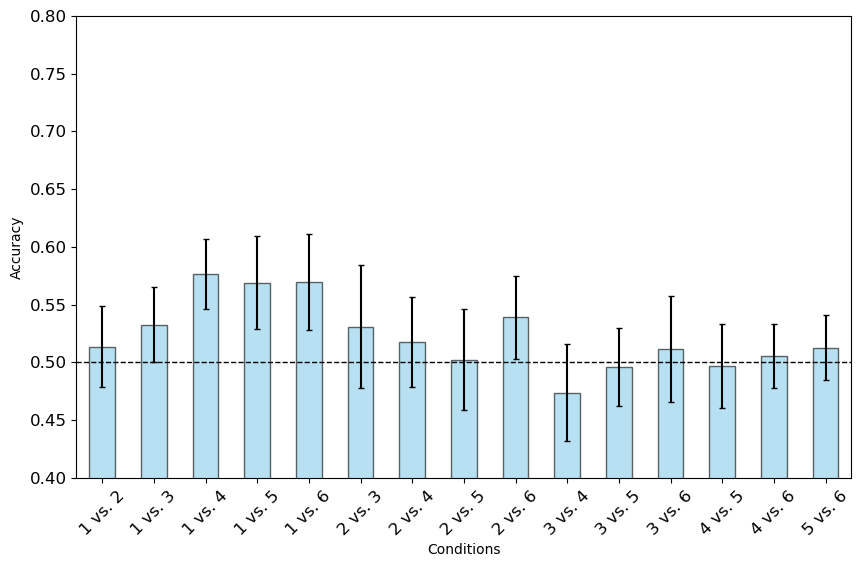

adult subject sub-07: visual data will be visualized


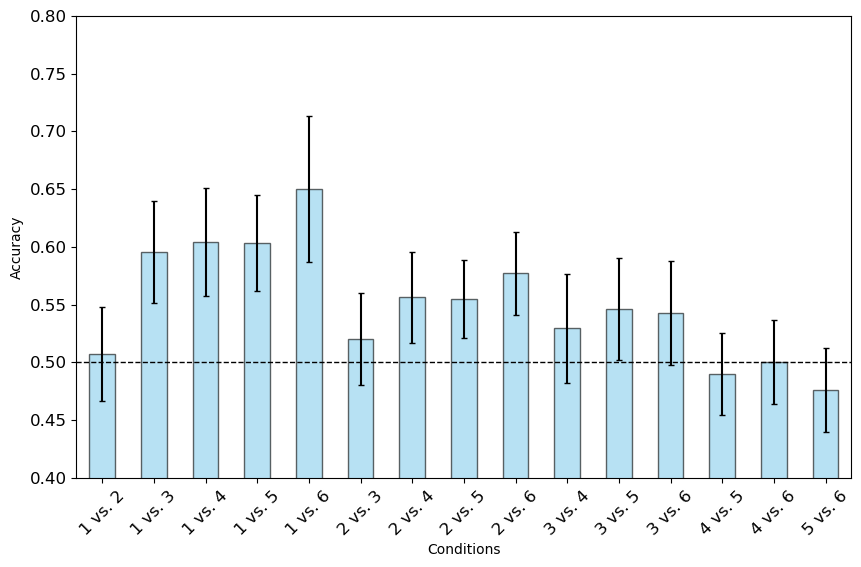

adult subject sub-08: visual data will be visualized


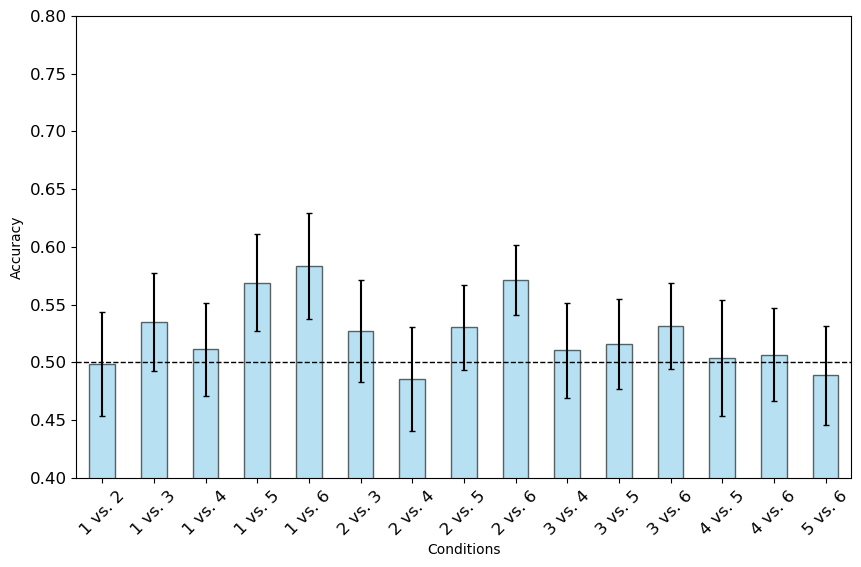

In [2]:
# load data
# ~~~~~~~~~~~~~~ Parameters
group = 'adult' # 'adult' or 'baby'
modality = 'visual' # 'visual' or 'audio'

subject_lists = ['sub-03', 'sub-04', 'sub-05', 'sub-06', 'sub-07', 'sub-08']

for subject in subject_lists:


    # Print out each parameter
    print(f"{group} subject {subject}: {modality} data will be visualized")
    # ~~~~~~~~~~~~~~ Parameters ~~~~~~~~~~~~~~


    # ~~~~~~~~~~~~~~ Set the working directory
    path = f"/ptmp/kazma/DATA-MINT/data/{group}/processed/{modality}"
    sub_folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
    sub_folders_sorted = sorted(sub_folders, key=lambda x: int(re.search(r'\d+', x).group())) # Sort the folders based on the numeric part after "sub-"
    # ~~~~~~~~~~~~~~ Set the working directory ~~~~~~~~~~~~~~



    ### SUB_LOOP


    filename_acc = f"EEGNet_accuracy_all.pkl"

    sub_filename_accuracy = os.path.join(path, subject, filename_acc)

    # Open the file and load data
    with open(sub_filename_accuracy, 'rb') as file:
        data = pickle.load(file)
    data_acc = pd.DataFrame([data])

    # each subject's file name
    filename_std = f"EEGNet_std_all.pkl"

    sub_filename_std = os.path.join(path, subject, filename_std)

    # Open the file and load data
    with open(sub_filename_std, 'rb') as file:
        data = pickle.load(file)
    data_std = pd.DataFrame([data])

    # Define column names as shown in the image
    column_names = [
        "1 vs. 2",
        "1 vs. 3",
        "1 vs. 4",
        "1 vs. 5",
        "1 vs. 6",
        "2 vs. 3",
        "2 vs. 4",
        "2 vs. 5",
        "2 vs. 6",
        "3 vs. 4",
        "3 vs. 5",
        "3 vs. 6",
        "4 vs. 5",
        "4 vs. 6",
        "5 vs. 6"
    ]

    # Convert column name
    data_acc.columns=column_names
    data_std.columns=column_names
    std_values = data_std.iloc[0]

    data_acc.iloc[0].plot(kind='bar', 
                    figsize=(10, 6), 
                    color='skyblue', 
                    alpha=0.6,
                    edgecolor='black',
                    linewidth=1,
                    yerr = std_values,
                    capsize=2)
    plt.xlabel("Conditions")
    plt.ylabel("Accuracy")
    plt.ylim(0.4,0.8)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(np.arange(0.4, 0.81, 0.05), labels=[f'{y:.2f}' for y in np.arange(0.4, 0.81, 0.05)], fontsize=12)
    plt.axhline(y=0.5, color='black', linestyle='--', linewidth=1)

    # save the image
    figname = f"EEGNet_decoding_all.png"

    #
    plt.savefig(f"{path}/{subject}/{figname}", dpi=300, bbox_inches='tight')

    plt.show()